In [15]:
documents = []

file = open('Tratando Arquivos/docs.txt', 'r')
for line in file:
    documents.append(line)
file.close()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000 # max number of uniq words

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [17]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 20
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tf)

In [18]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                            for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(message)
    print()

In [19]:
no_top_words = 5
display_topics(nmf, tf_feature_names, no_top_words)

Topic #0: going bed think week soon
Topic #1: quot say love oh watching
Topic #2: work morning ready week weekend
Topic #3: day long nice beautiful sunny
Topic #4: like feel looks feels sounds
Topic #5: http com twitpic tinyurl plurk
Topic #6: today feeling weather rain sick
Topic #7: got just new bad think
Topic #8: really bad need sick feel
Topic #9: good morning bad luck feel
Topic #10: im sorry lol gonna lonely
Topic #11: time bed long great week
Topic #12: want dont bed right watch
Topic #13: sleep night need tired bed
Topic #14: sad makes oh love watching
Topic #15: home sick wish come way
Topic #16: know lol oh think dont
Topic #17: school tomorrow hate ready getting
Topic #18: amp sick love hope think
Topic #19: miss gonna love friends days



In [20]:
import pandas as pd
import numpy as np
   
# Create Document - Topic Matrix
nmf_output = nmf.transform(tf)

# column names
topicnames = ["Topic" + str(i) for i in range(no_topics)]

# index names
docnames = ["Doc" + str(i) for i in range(len(documents))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(nmf_output, 6), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
   color = 'green' if val > .1 else 'black'
   return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,dominant_topic
Doc0,0,0,0,0.07767,0,0.14009,0,0.082487,0,0,0,0,0,0,0,0,0,0,0,0,5
Doc1,0,0,0,0,0,0.001371,0.077635,0,0,0,0,0,0,0,0,0,0,0.06045,0,0,6
Doc2,0.000108,0,0,0.000549,0.000601,0.000189,0,3.6e-05,0,0.001868,0,0.000103,0,0.000575,0.000482,0,0.000173,1e-05,5.3e-05,0.000245,9
Doc3,0,0,0,0,0.07833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
Doc4,0,0,0,0,0,0,0,0,0,0,0.000546,0,0,0,0,0,0,0,0,0,10
Doc5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Doc6,0,0,5.1e-05,0,0,0,0.000221,0,0.005064,0,0,0.000138,0,0.01868,0,0,0.001168,0,0,0,13
Doc7,0.000106,0,0.000325,0.003294,0.000922,0.00765,0.000455,0.002325,0,0.000944,0.005129,0.090401,0,0.001188,0.000124,0,0.0251,0,0.001965,0.000914,11
Doc8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Doc9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,16,7858
1,13,4150
2,0,4051
3,15,2642
4,17,2591
5,9,2320
6,7,2313
7,4,2237
8,3,2205
9,19,2169


Text(0.5,1,'Segregation of Topic Clusters')

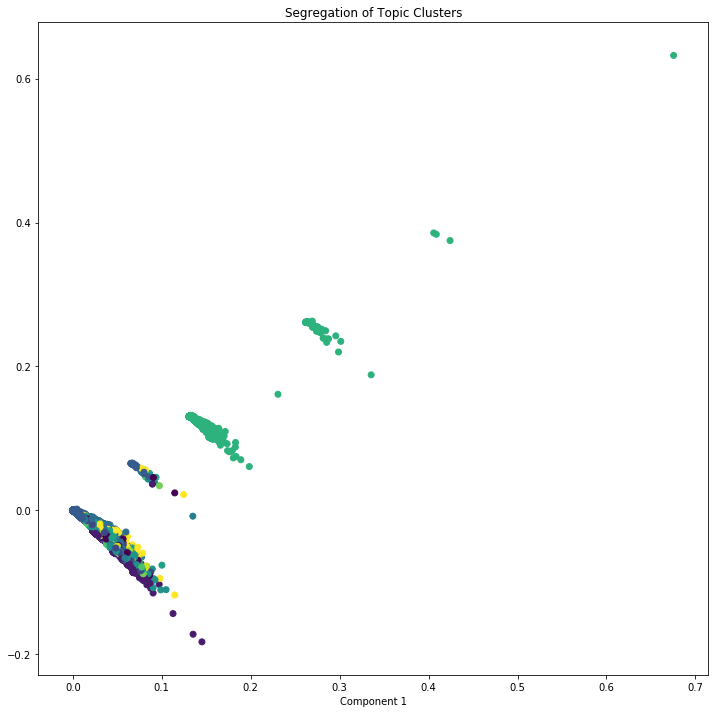

In [23]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(nmf_output)

# Build the Singular Value Decomposition(SVD) model
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=2)  # 2 components
nmf_output_svd = svd_model.fit_transform(nmf_output)

# X and Y axes of the plot using SVD decomposition
x = nmf_output_svd[:, 0]
y = nmf_output_svd[:, 1]

# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )